In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# İndeksi değişken olarak görüyor bu yüzden düzeltmemiz gerekiyor usecols kullanımı bundandır
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().values.any()

False

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


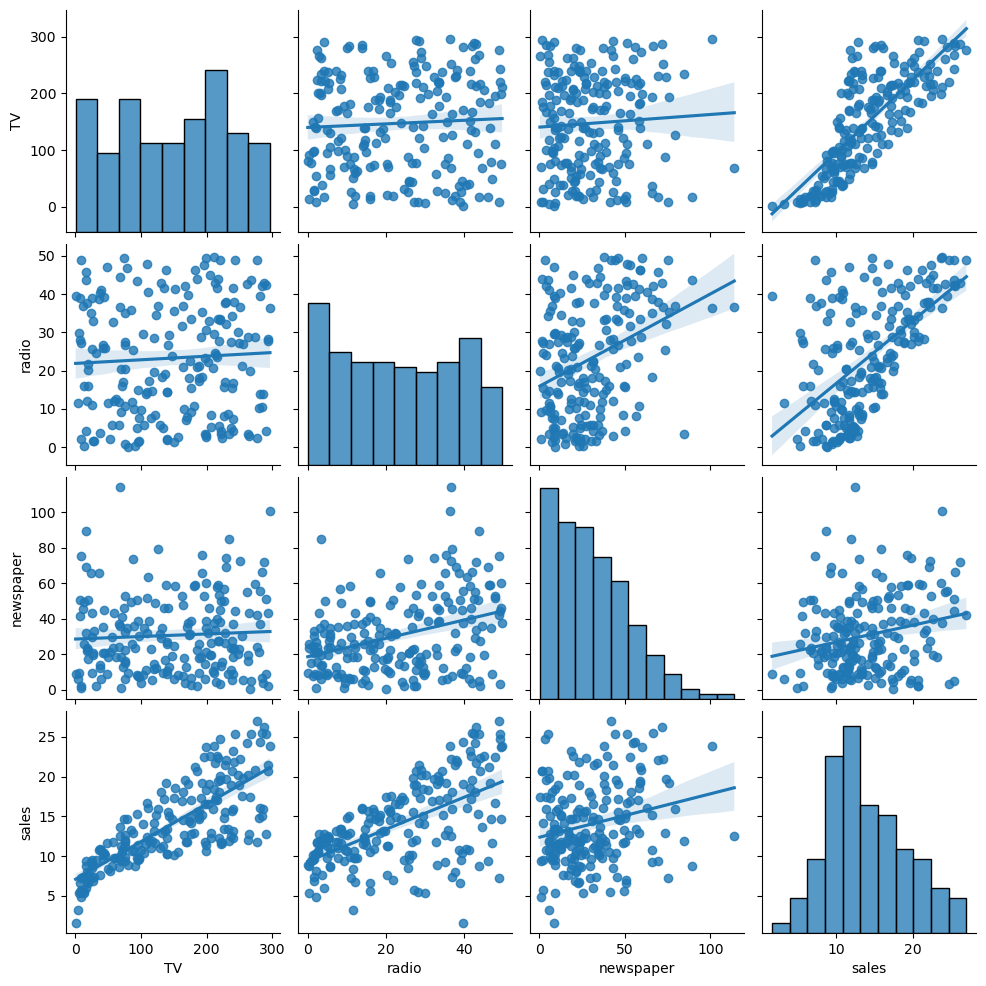

In [10]:
sns.pairplot(df, kind="reg");

In [15]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

## Statsmodels ile Modelleme

In [17]:
# X -> Bağımsız değişken
X = df[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
X = sm.add_constant(X)

In [20]:
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [21]:
# y -> bağımlı değişken
y = df["sales"]

In [22]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
# Model Kurma lm -> lineer model
lm = sm.OLS(y, X)

In [24]:
# Modeli uygulama aşaması
model = lm.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        15:15:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

burda R-square(R kare) açıklanabilirlik oranıdır veriye alakalı alakasız değişkenler eklendikçe bu ifadede artabilir doğru yolda olduğumuzu düşünebiliriz bu yanıltıcıdır o yüzden Adj R-square(düzeltilmiş r kare) bizim için daha doğru değerdir.

F-statistic(f-istatistiği) modelin anlamlılığı ilişkin istatistiktir önemlidir gene bizim için

prob(F-statistic) modelin anlamlılığına ilişkin p-value değeridir.

In [26]:
# Değişkenleri isimlendirerek aynı modeli farklı şekilde kurmak
lm = smf.ols("sales ~ TV", df)
model = lm.fit ()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        15:17:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# B0 ve B1 değerleri
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [28]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [30]:
# Katsayıların güven aralıklarına ulaşmak için
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
# Modelin anlamlılığına ilişkin istatistiklere erişmek için
model.f_pvalue

1.467389700194626e-42

In [32]:
# Yukarıdaki p-value değerini e siz şekilde yazdırma
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [33]:
# f istatistiğine erişmek
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [34]:
#Parametrelerin anlamlılığına ilişkin değerlere erişmek için
print("tvalue: ", "%.2f" % model.tvalues[:1])

tvalue:  15.36


In [35]:
# Model değerlendirme istatistiğine erişmek için
# Hata kareler ortalamasına erişmiş olucaz
model.mse_model

3314.6181668686495

In [41]:
# r^2 değeri
model.rsquared

0.6118750508500712

In [42]:
# Düzeltilmiş r^2 değeri
model.rsquared_adj

0.6099148238341625

In [43]:
# Modelin tahmin ettiği il 5 değere erişmek için
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [44]:
# Orijinal değerler için
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [45]:
# Modelin matematiksel formülünü yazdırmak için
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


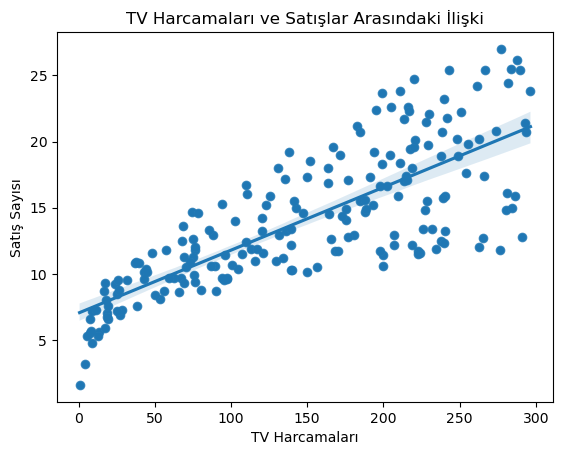

In [47]:
# "TV" değişkeninin dağılım grafiğini çiz
sns.scatterplot(x=df["TV"], y=df["sales"])

# Regresyon çizgisini ekle
sns.regplot(x=df["TV"], y=df["sales"])

# Grafik başlığını ve eksen etiketlerini ekle
plt.title("TV Harcamaları ve Satışlar Arasındaki İlişki")
plt.xlabel("TV Harcamaları")
plt.ylabel("Satış Sayısı")

# Grafiği göster
plt.show()

##  sklearn üzerinden Lineer Regresyon Modeli Oluşturma


In [48]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

7.0325935491276885
[0.04753664]


In [49]:
# r^2 değeri;
model.score(X, y)

0.611875050850071

In [50]:
# Tahmin edilen değerlere erişmek için;
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin
Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [51]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [52]:
model.predict([[30]])

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

Birden fazla değerlerin tahmini nasıl yapılır?

In [53]:
new_data = [[5],[90],[200]]
model.predict(new_data)

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [54]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [56]:
# Hara kareler ortalaması
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [57]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [58]:
# Tahmin değerleri
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [59]:
# Gerçek değerler
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [60]:
# Karşılaştırma yapalım
k_t = pd.DataFrame({"Gercek_y": y[:10],
                    "Tahmin_y": reg.predict(X)[:10]})
k_t

,Gercek_y,Tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [62]:
# Hata değeri ekleyelim bu tabloya
k_t["Hata"] = k_t["Gercek_y"] - k_t["Tahmin_y"]
k_t

,Gercek_y,Tahmin_y,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
# Hata kare değeri de ekleyelim bu tabloya
k_t["Hata_kare"] = k_t["Hata"] ** 2
k_t

,Gercek_y,Tahmin_y,Hata,Hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [65]:
# Hata Kareler toplamımız
np.sum(k_t["Hata_kare"])

92.90350329638105

In [66]:
# Hata Kareler Ortalaması
np.mean(k_t["Hata_kare"])

9.290350329638105

In [67]:
# Hata Kareler Ortalaması Karekök
np.sqrt(np.mean(k_t["Hata_kare"]))

3.048007599996776

In [68]:
# Modelin artıklarını ifade eden artıklara bir bakalım
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

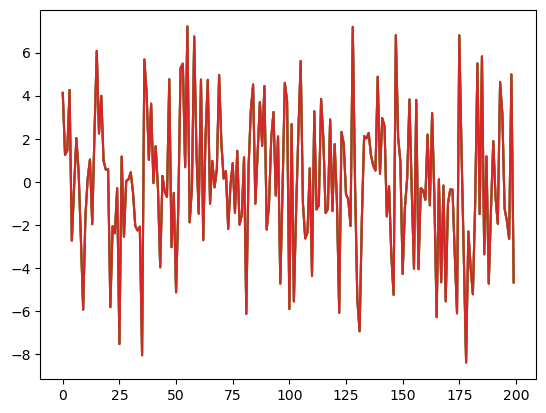

In [72]:
# Modelin artıklarını ifade eden artıkların görsel gösterimi
plt.plot(model.resid);
plt.show()